<a href="https://colab.research.google.com/github/jinunyachhyon/Deep-Learning---PyTorch/blob/main/VGG_16_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-16 Architecture

In [90]:
# Imports 
import torch
import torch.nn as nn

In [91]:
# VGG-16 architecture - convolution layer
VGG16 = [64,64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M']

In [92]:
# Create VGG-16 architecture
class VGG_net(nn.Module):
  def __init__(self, in_channels=3, num_classes=1000):
    super(VGG_net, self).__init__()
    self.in_channels = in_channels
    self.conv_layers = self.create_conv_layers(VGG16)
    self.fcs = nn.Sequential(
        nn.Linear(512*7*7, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),

        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(p=0.5),

        nn.Linear(4096, num_classes)
    )

  def forward(self, x):
      x = self.conv_layers(x)
      x = x.reshape(x.shape[0], -1)
      x = self.fcs(x)
      return x

  def create_conv_layers(self, architecture):
    layers = []
    in_channels = self.in_channels

    for x in architecture:
      if type(x) == int:
        out_channels = x

        layers += [nn.Conv2d(in_channels= in_channels, 
                             out_channels= out_channels,
                             kernel_size=(3,3),
                             stride=(1,1),
                             padding=(1,1)),
                   nn.BatchNorm2d(x),
                   nn.ReLU()]
        in_channels = x

      elif x == 'M':
        layers += [nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))]

    return nn.Sequential(*layers)

In [93]:
# Instantiate the model 
model = VGG_net()

In [94]:
# Model summary to compare params
from torchsummary import summary

summary(model, (3,244,244))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 244, 244]           1,792
       BatchNorm2d-2         [-1, 64, 244, 244]             128
              ReLU-3         [-1, 64, 244, 244]               0
            Conv2d-4         [-1, 64, 244, 244]          36,928
       BatchNorm2d-5         [-1, 64, 244, 244]             128
              ReLU-6         [-1, 64, 244, 244]               0
         MaxPool2d-7         [-1, 64, 122, 122]               0
            Conv2d-8        [-1, 128, 122, 122]          73,856
       BatchNorm2d-9        [-1, 128, 122, 122]             256
             ReLU-10        [-1, 128, 122, 122]               0
           Conv2d-11        [-1, 128, 122, 122]         147,584
      BatchNorm2d-12        [-1, 128, 122, 122]             256
             ReLU-13        [-1, 128, 122, 122]               0
        MaxPool2d-14          [-1, 128,

From the original paper, VGG-16 model should have 138 million parameters which matches with the model summary we created.

In [96]:
# Validating the model with example (1 image with shape=3x224x224)
x = torch.randn(5, 3, 224, 224)
model(x).shape

torch.Size([5, 1000])

# CIFAR-10 dataset

## Load CIFAR-10 dataset

In [98]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define the transformations to apply to the CIFAR-10 data
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Download and load train and test data
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [99]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [102]:
feature, label = train_dataset[0]
feature.shape

torch.Size([3, 224, 224])

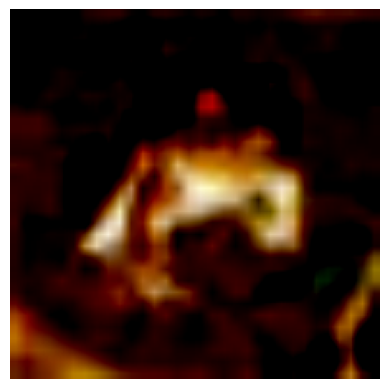

In [105]:
# Let's visualize the first image in the train_dataset
import matplotlib.pyplot as plt
import numpy as np

# Transpose the image tensor from 3x224x224 to 224x224x3
image = np.transpose(feature, (1, 2, 0))

# Display the image
plt.imshow(image)
plt.axis('off') # To remove axis label 
plt.show()

## DataLoader for train-test Dataset

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_Size=64, shuffle=True, num_workers=2)